In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',2000, 'display.max_columns',100)
women_power = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Women%20Entrepreneurship%20and%20Labor%20Force/Dataset3.csv",delimiter=';')
women_power.shape

(51, 9)

In [50]:
women_power.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [51]:
women_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [52]:
fig = px.pie(women_power, values='Women Entrepreneurship Index', names='Country',
             title='Countrywise Women Entrepreneurship Index',hole=.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [53]:
women_power.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [54]:
women_power_new = women_power.groupby(['Country','Women Entrepreneurship Index','Entrepreneurship Index']).count().reset_index().sort_values('Women Entrepreneurship Index',ascending=False)
women_power_new_WI = (women_power_new['Women Entrepreneurship Index'] * 0.5).tolist()
fig = go.Figure(data=[go.Scatter(
    x=women_power_new['Country'],
    y=women_power_new['Women Entrepreneurship Index'],
    mode='markers',
    marker=dict(
        size=women_power_new_WI,
    color=women_power_new_WI,
        showscale=True
        )
)])
fig.update_layout(
    title='Women Entrepreneurship Index in the World',
    xaxis_title="States",
    yaxis_title="Women Entrepreneurship Index",
)
fig.update_xaxes(tickangle=270)
fig.show()

In [55]:
fig = px.histogram(women_power,x='Level of development',color="European Union Membership")
fig.update_xaxes(tickangle=270, tickfont=dict(size=14))
fig.update_layout(
    title='Developed/Developing Country and Member of European Union Membership')
fig.show()

In [56]:
fig = px.bar(women_power, x="Level of development", y="Entrepreneurship Index",
             color='Country', barmode='group',
             height=400)
fig.update_layout(
    title='Level of development in the country and their Entrepreneurship Index')
fig.show()

In [57]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=women_power['Country'], y=women_power['Entrepreneurship Index'],
                    mode='lines+markers',
                    name='Entrepreneurship Index'))

fig.add_trace(go.Scatter(x=women_power['Country'], y=women_power['Women Entrepreneurship Index'],
                    mode='lines+markers',
                    name='Women Entrepreneurship Index'))
fig.update_xaxes(tickangle=270)
fig.update_layout(
    title='Entrepreneurship Index Vs Women Entrepreneurship Index in Country')
fig.show()

In [58]:
fig = px.bar(women_power, x='Country', y='Inflation rate', text='Country')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=270)
fig.update_layout(
    title='Inflation rate of country')
fig.update_traces(marker_color='rgb(0,0,255)', marker_line_color='rgb(255,0,0)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=women_power['Country'], y=women_power['Female Labor Force Participation Rate'],
                    mode='lines+markers',name='Female Labor Force Participation Rate'))
fig.update_traces(marker_color='rgb(255,64,0)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_xaxes(tickangle=270, tickfont=dict(size=14))
fig.update_layout(title_text='Female Labor Force Participation Rate')
fig.show()

<AxesSubplot:title={'center':'Correlation Factor'}>

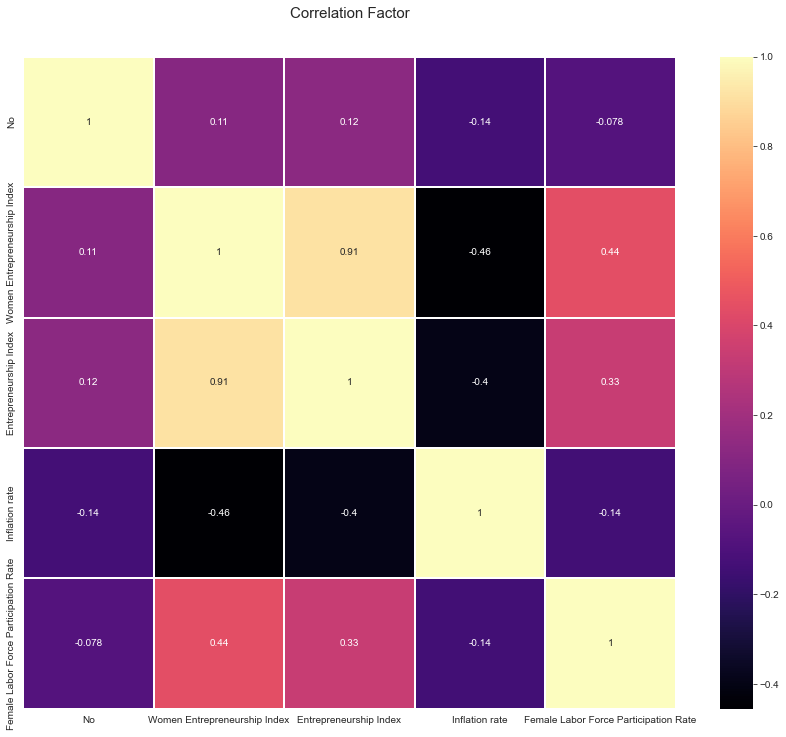

In [60]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Correlation Factor', y=1.05, size=15)
sns.heatmap(women_power.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [61]:
fig = px.scatter(women_power, x="Women Entrepreneurship Index", y="Female Labor Force Participation Rate", trendline="ols")
fig.update_layout(
    title='Positive Relation between Women Entrepreneurship Index and Female Labor Force Participation Rate')
fig.show()

In [62]:
women_power_in_EU = women_power[women_power['Currency'] == 'Euro']
women_power_in_EU = women_power_in_EU.iloc[women_power_in_EU.groupby(['Level of development'])['Women Entrepreneurship Index'].idxmax()][['Country','Level of development','Women Entrepreneurship Index']].sort_values('Women Entrepreneurship Index',ascending=False)
women_power_in_EU
print("European Union Country with Highest Women Entrepreneurship Index")
print("                                                     ")
print(women_power_in_EU)
print("                                                     ")
print("==================================================================")
print("                                                     ")
women_power_in_EU = women_power[women_power['Currency'] == 'Euro']
women_power_in_EU = women_power_in_EU.iloc[women_power_in_EU.groupby(['Level of development'])['Women Entrepreneurship Index'].idxmin()][['Country','Level of development','Women Entrepreneurship Index']].sort_values('Women Entrepreneurship Index',ascending=False)
women_power_in_EU
print("European Union Country with Lowest Women Entrepreneurship Index")
print("                                                     ")
print(women_power_in_EU)
print("                                                     ")
print("==================================================================")
print("                                                     ")
women_power_WI_MIN = women_power.iloc[women_power.groupby(['Level of development'])['Women Entrepreneurship Index'].idxmax()][['Country','Level of development','Women Entrepreneurship Index']].sort_values('Women Entrepreneurship Index',ascending=False)
women_power_WI_MIN
print("Non European Union Country with Highest Women Entrepreneurship Index")
print("                                                     ")
print(women_power_WI_MIN)
print("                                                     ")
print("==================================================================")
print("                                                     ")
women_power_WI_MIN = women_power.iloc[women_power.groupby(['Level of development'])['Women Entrepreneurship Index'].idxmin()][['Country','Level of development','Women Entrepreneurship Index']].sort_values('Women Entrepreneurship Index',ascending=False)
women_power_WI_MIN
print("Non European Union Country with Lowest Women Entrepreneurship Index")
print("                                                     ")
print(women_power_WI_MIN)

European Union Country with Highest Women Entrepreneurship Index
                                                     
        Country Level of development  Women Entrepreneurship Index
11  Netherlands            Developed                          69.3
                                                     
                                                     
European Union Country with Lowest Women Entrepreneurship Index
                                                     
  Country Level of development  Women Entrepreneurship Index
6  Greece            Developed                          43.0
                                                     
                                                     
Non European Union Country with Highest Women Entrepreneurship Index
                                                     
      Country Level of development  Women Entrepreneurship Index
20  Australia            Developed                          74.8
50    Uruguay           Developing    

In [63]:
women_power_new_FR = (women_power_new['Female Labor Force Participation Rate'] * 0.5).tolist()
fig = px.scatter(women_power, y="Women Entrepreneurship Index", x="Country", color= 'Women Entrepreneurship Index',
                 size="Female Labor Force Participation Rate")
fig.update_layout(
    title='Total Women Entrepreneurship Index and Female Participation ')
fig.update_xaxes(tickangle=270)
fig.show()

In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=women_power['Country'], y=women_power['Female Labor Force Participation Rate'],
                    mode='lines+markers',
                    name='Female Labor Force Participation Rate'))
fig.add_trace(go.Scatter(x=women_power['Country'], y=women_power['Women Entrepreneurship Index'],
                    mode='lines+markers',
                    name='Women Entrepreneurship Index'))

fig.update_xaxes(tickangle=270)
fig.update_layout(
    title='Female Labor Force Participation Rate Vs Women Entrepreneurship Index in Country')
fig.show()

In [65]:
fig = px.scatter(women_power, x="Entrepreneurship Index", y="Country", color= 'Entrepreneurship Index',
                 size="Female Labor Force Participation Rate")
fig.update_layout(
    title='Total Entrepreneurship Index and Female Participation ')
fig.update_xaxes(tickangle=270)
fig.show()

In [66]:
fig = px.bar(women_power, x="European Union Membership", y="Inflation rate",color='Country',barmode='group',
             height=650)
fig.update_layout(
    title='Inflation rate in EU and Non EU Women Entrepreneurship Index Members')
fig.show()

In [67]:
fig = px.scatter(women_power, x="Women Entrepreneurship Index", y="Inflation rate", trendline="ols")
fig.update_layout(
    title='Negative Relation between Women Entrepreneurship Index and Inflation Rate')
fig.show()

In [68]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=women_power['Country'], y=women_power['Inflation rate'],
                    mode='lines+markers',
                    name='Female Labor Force Participation Rate'))
fig.add_trace(go.Scatter(x=women_power['Country'], y=women_power['Women Entrepreneurship Index'],
                    mode='lines+markers',
                    name='Women Entrepreneurship Index'))

fig.update_xaxes(tickangle=270)
fig.update_layout(
    title='Inflation Rate Vs Women Entrepreneurship Index in Country')
fig.show()

In [69]:
fig = px.bar(women_power, x="Currency", y="Inflation rate",color='Country',barmode='group',
             height=650)
fig.update_layout(
    title='Inflation rate because of Currency')
fig.show()